# Project on "Loan Prediction"

Classification problem: Predict if a loan will get approved or not

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib as mpl
mpl.style.use("ggplot")
import matplotlib.pyplot as plt

import warnings #to remove warning from the notebook
warnings.filterwarnings(action='ignore')

In [2]:
df = pd.read_csv("/Users/admin/Desktop/Project/loan prediction/Loan.csv")
df.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
df.shape

(614, 13)

In [4]:
df["Total income"]=(df["ApplicantIncome"]+df["CoapplicantIncome"])/2
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total income
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,2924.5
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,3045.5
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,1500.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,2470.5
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,3000.0


In [5]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Total income
count,614.000000,614.000000,592.000000,600.00000,564.000000,614.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199,3512.352541
std,6109.041673,2926.248369,85.587325,65.12041,0.364878,3229.331936
min,150.000000,0.000000,9.000000,12.00000,0.000000,721.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000,2083.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000,2708.250000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000,3760.875000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000,40500.000000


In [6]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
Total income         float64
dtype: object

# Data Cleaning and filling missing values

# Missing Values: Check where there are missing value and fix them appropriately

In [7]:
#isnull() function detect missing values in the given series object.
df.isnull().head()  # output giving in "True = missing value" or "false"

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total income
0,False,False,False,False,False,False,False,False,True,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [8]:
# counting missing values(every column)
total = df.isnull().sum()
total

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
Total income          0
dtype: int64

In [9]:
df["Gender"].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [10]:
df["Married"].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [11]:
df["Dependents"].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [12]:
# Filling missing values in column
df.Gender=df.Gender.fillna("Male")

df.Married=df.Married.fillna("Married")

df.Dependents=df.Dependents.fillna("0")



In [13]:
df.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
Total income          0
dtype: int64

In [14]:
# Droping null columns

df.dropna(inplace=True)

In [15]:
df.shape

(504, 14)

In [16]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
Total income         0
dtype: int64

# Converting Categorical Variable into Numeric:

In [17]:
from sklearn.preprocessing import LabelEncoder
var_mod=["Gender","Married","Dependents","Education",
         "Self_Employed","Property_Area","Loan_Status"]
le = LabelEncoder()
#. df["Gender"]= le.fit_transform(df["Gender"])  #for this column
for i in var_mod:
    df[i] = le.fit_transform(df[i])  # all column in var_mod

In [18]:
df.head(55)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total income
1,LP001003,1,2,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0,3045.5
2,LP001005,1,2,0,0,1,3000,0.0,66.0,360.0,1.0,2,1,1500.0
3,LP001006,1,2,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1,2470.5
4,LP001008,1,1,0,0,0,6000,0.0,141.0,360.0,1.0,2,1,3000.0
5,LP001011,1,2,2,0,1,5417,4196.0,267.0,360.0,1.0,2,1,4806.5
6,LP001013,1,2,0,1,0,2333,1516.0,95.0,360.0,1.0,2,1,1924.5
7,LP001014,1,2,3,0,0,3036,2504.0,158.0,360.0,0.0,1,0,2770.0
8,LP001018,1,2,2,0,0,4006,1526.0,168.0,360.0,1.0,2,1,2766.0
9,LP001020,1,2,1,0,0,12841,10968.0,349.0,360.0,1.0,1,0,11904.5
10,LP001024,1,2,2,0,0,3200,700.0,70.0,360.0,1.0,2,1,1950.0


### Let's Check correlation

In [19]:
corr=df.corr()

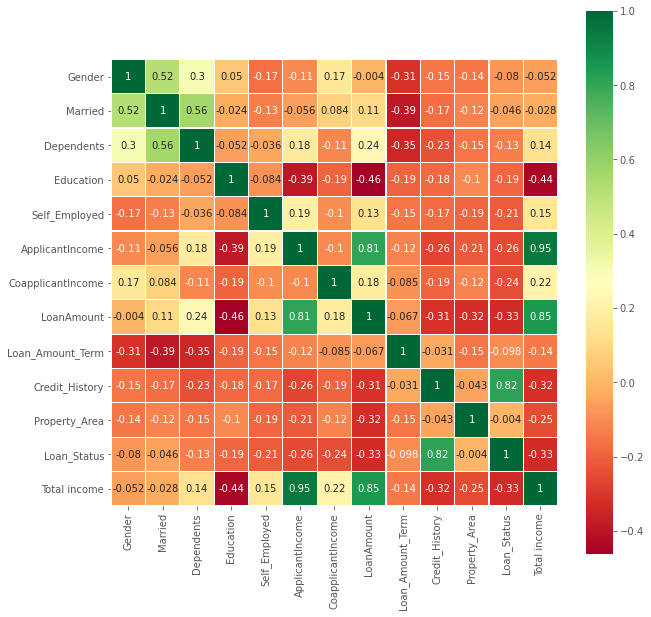

In [20]:
plt.figure(figsize=(10,10))
heat=sns.heatmap(corr.corr().round(3),annot=True,cmap="RdYlGn",square=True,linewidths=0.2)

In [21]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total income
1,LP001003,1,2,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0,3045.5
2,LP001005,1,2,0,0,1,3000,0.0,66.0,360.0,1.0,2,1,1500.0
3,LP001006,1,2,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1,2470.5
4,LP001008,1,1,0,0,0,6000,0.0,141.0,360.0,1.0,2,1,3000.0
5,LP001011,1,2,2,0,1,5417,4196.0,267.0,360.0,1.0,2,1,4806.5


# Features Selection:

Here, you need to divide given columns into two types of variables dependent(target variable) and independent (feature variable).

the iloc indexer for Panda DataFrame  is used for integer location based indexing/selection by position

In [22]:
"""After obserivng heatplot, we apply only those variables which affect the target"""

X=df[["Married","Total income","Credit_History","LoanAmount"]]
y = df.iloc[:,12]
                      
             # dependent variable

#  column start from 0

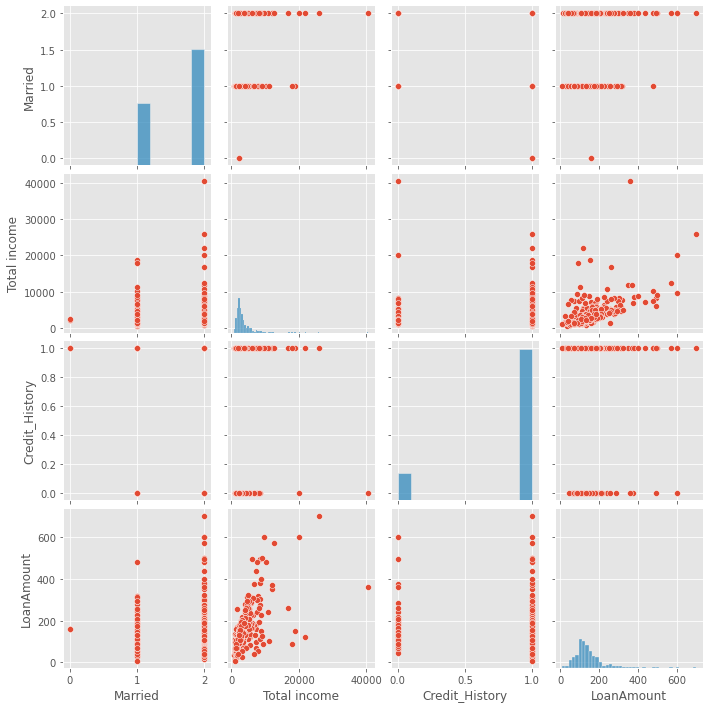

In [23]:
# let's see selected features in pairplot
sns.pairplot(data=X)

In [24]:
y.head()

1    0
2    1
3    1
4    1
5    1
Name: Loan_Status, dtype: int64

# Splitting the Data:

In [25]:
# Applying StratifiedKold technique
 

from sklearn.model_selection import StratifiedKFold
folds=StratifiedKFold(n_splits=5)


for train_index,test_index in folds.split(X,y):
    x_train,x_test,y_train,y_test = X.iloc[train_index],X.iloc[test_index],y.iloc[train_index],y.iloc[test_index]
                                      

In [26]:
x_test.head()

,Married,Total income,Credit_History,LoanAmount
496,2,2150.0,1.0,107.0
498,2,1447.5,1.0,95.0
499,1,5349.5,0.0,209.0
500,1,2164.0,1.0,113.0
501,1,1579.5,1.0,100.0


In [27]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)

(404, 4)
(100, 4)
(404,)


In [28]:
x_train["Credit_History"].value_counts()

1.0    343
0.0     61
Name: Credit_History, dtype: int64

In [29]:
x_test["Credit_History"].value_counts()

1.0    83
0.0    17
Name: Credit_History, dtype: int64

In [30]:
343/63,83/17

(5.444444444444445, 4.882352941176471)

In [31]:
y.shape

(504,)

# Logistic Regression Model :

firstly, import the logistic model regression

In [32]:
from sklearn.linear_model import LogisticRegression
# Creating Logistic Regression classifier object
lr=LogisticRegression()

In [33]:
## fit the model with data
lr.fit(x_train,y_train)
y_predit=lr.predict(x_test)
y_predit

array([1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0])

In [34]:
y_test

496    1
498    1
499    0
500    1
501    1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 100, dtype: int64

## Model Evaluation using Confusion Matrix (Binary Classification model)

In [35]:
from sklearn import metrics
cnf_matrixs= metrics.confusion_matrix(y_test,y_predit)
print(cnf_matrixs)

[[16 15]
 [ 2 67]]


In [36]:
print("Accuracy:",metrics.accuracy_score(y_test,y_predit))


Accuracy: 0.83


<AxesSubplot:xlabel='Loan_Status', ylabel='Density'>

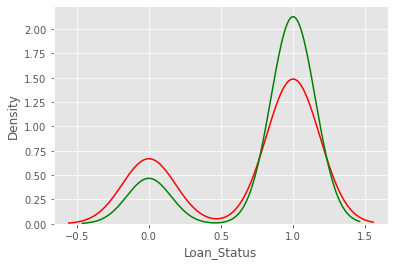

In [37]:
import seaborn as sns
s = sns.distplot(y_test,hist = False,color="r",label="Actual data")
sns.distplot(y_predit,hist = False,color="g",label="Predicat data ", ax = s )

## Visualizing Confusion Matrix using Heatmap:

In [38]:
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline

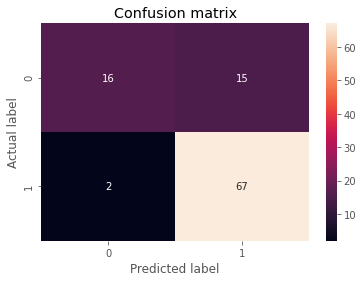

In [39]:
import seaborn as sn
#Here, annot is an array of same shape as data which is used to annatate the heatmap
sn.heatmap(cnf_matrixs,annot=True)
    #
plt.title("Confusion matrix")
plt.ylabel("Actual label")
plt.xlabel("Predicted label")
plt.show()

<AxesSubplot:>

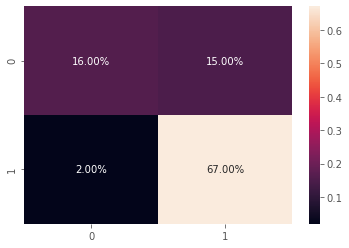

In [40]:
# Represent Heatmap with confusion matrix in form of Percentage:
sn.heatmap(cnf_matrixs/np.sum(cnf_matrixs),annot = True,
          fmt=".2%")
# fmt- string formatting code to use whenadding annotations.

<AxesSubplot:>

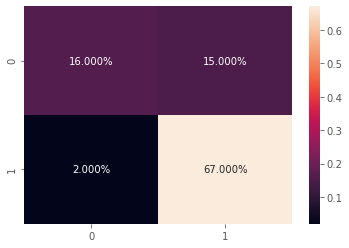

In [41]:
sn.heatmap(cnf_matrixs/np.sum(cnf_matrixs),annot = True,
          fmt=".3%")

# Let's predict whether the loan will get approved or not for a person(John) who is applying for loan:

Convert the categorical variable value into numeric form.

Gender : Male (1)
Married: Yes (1)
Dependents: 1
Education: Graduate (0)
Self_Employed: No (0)
ApplicantIncome: 8000
CoapplicantIncome: 2000
LoanAmount (in thousand): 130 Loan_Amount_Term(Term of loan in months): 24 Credit_History: 0.0
Property_Area (Urban/ Semi Urban/ Rural): Urban (2)

# Applying various model and compare which is best:

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import cross_val_score

from sklearn import metrics
from sklearn.metrics import mean_squared_error

lr = LogisticRegression()
kn = KNeighborsClassifier()
dt = DecisionTreeClassifier()
svc = SVC(random_state = 43, C = 10, gamma = 0.1, kernel ='rbf')
gnb = GaussianNB()
rf = RandomForestClassifier(n_estimators = 50,random_state=43)

In [49]:
models = [rf, dt, kn, svc,lr, gnb]

for model in models:
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    scores = cross_val_score(model, X, y, cv=5).mean().round(3)
    accuracy = metrics.accuracy_score(y_test, y_pred).round(3)
    #f1score = metrics.f1_score(y_test, y_pred).round(3)
    print(model, '\n', 'Accuracy: ', accuracy,'\n', 'mean_CV_score: ',scores)

RandomForestClassifier(n_estimators=50, random_state=43) 
 Accuracy:  0.81 
 mean_CV_score:  0.796
DecisionTreeClassifier() 
 Accuracy:  0.74 
 mean_CV_score:  0.728
KNeighborsClassifier() 
 Accuracy:  0.64 
 mean_CV_score:  0.599
SVC(C=10, gamma=0.1, random_state=43) 
 Accuracy:  0.69 
 mean_CV_score:  0.679
LogisticRegression() 
 Accuracy:  0.83 
 mean_CV_score:  0.81
GaussianNB() 
 Accuracy:  0.81 
 mean_CV_score:  0.804


### -> We can make conclusion logistic Regression is better then others